In [7]:
import torch
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

image_path = 'data'
label_path = 'labels'
images_tensors = []
labels_tensors = []

# Getting a sorted list of filenames from both image and label directories
image_files = sorted(os.listdir(image_path))
label_files = sorted(os.listdir(label_path))

# Zipping the sorted filenames so they correspond to each other
for img_filename, lbl_filename in zip(image_files, label_files):
    if img_filename[9:12] == lbl_filename[7:10]:  # Matching filenames by position
        img_filepath = os.path.join(image_path, img_filename)
        lbl_filepath = os.path.join(label_path, lbl_filename)

        # Reading and converting images to tensors
        single_image = Image.open(img_filepath)
        single_image = ToTensor()(single_image)
        images_tensors.append(single_image)

        # Reading and converting labels to tensors
        single_label = Image.open(lbl_filepath)
        single_label = ToTensor()(single_label)
        labels_tensors.append(single_label)

In [34]:
from torchvision.transforms.functional import crop
def top_left_crop(image, h, w):
    return crop(image, h, w, 125, 125)

# cropping images and labels to 256x256 by starting at w, h = 0, 0, then w, h = 256, 0, then w, h = 0, 256 and finally w, h = 256, 256. This is done to get more data for training so extend the dataset
labels_tensors_cropped = []
images_tensors_cropped = []
# take 10 steps of 125 pixels in both directions
steps = 20
steps_length = 500 // steps
steps_list = [i * steps_length for i in range(steps-5)]

for i in steps_list:
    for j in steps_list:
        for image, label in zip(images_tensors[0:5], labels_tensors[0:5]):
            cropped_image = top_left_crop(image, i, j)
            cropped_label = top_left_crop(label, i, j)
            images_tensors_cropped.append(cropped_image)
            labels_tensors_cropped.append(cropped_label)

print(len(images_tensors_cropped))

1125


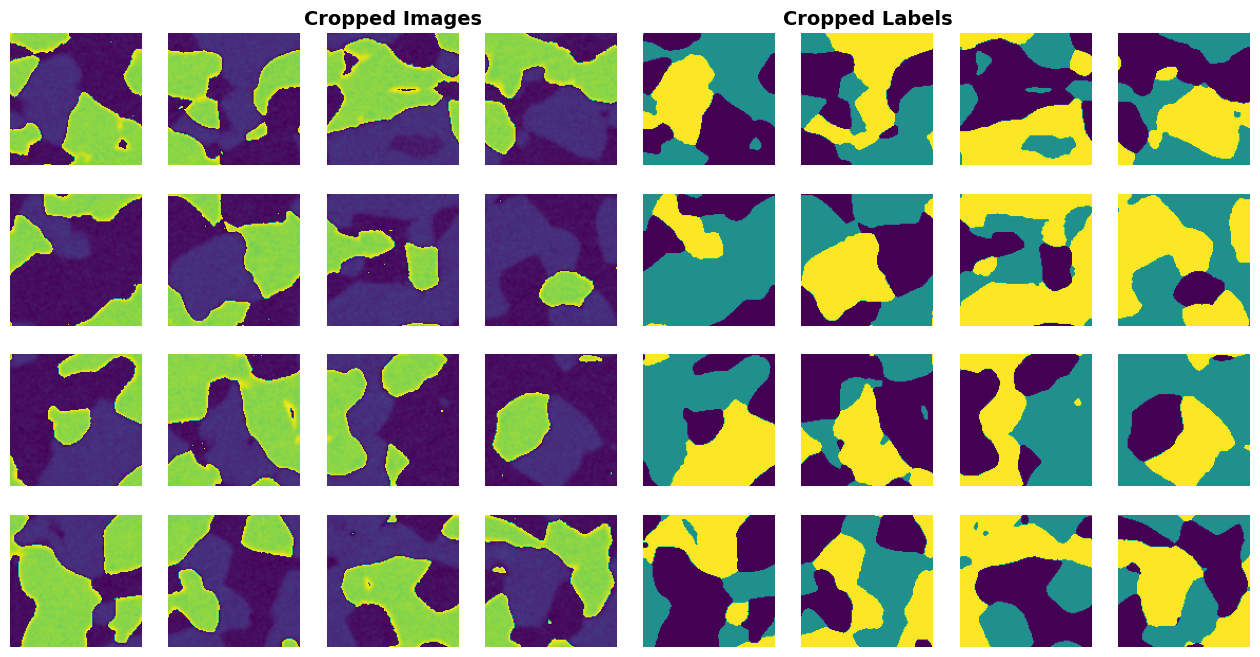

In [26]:
from torchvision.transforms.functional import crop
def top_left_crop(image, h, w):
    return crop(image, h, w, 125, 125)

# cropping images and labels to 256x256 by starting at w, h = 0, 0, then w, h = 256, 0, then w, h = 0, 256 and finally w, h = 256, 256. This is done to get more data for training so extend the dataset
labels_tensors_cropped = []
images_tensors_cropped = []


for i in range(len(images_tensors)):
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 0, 0))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 0, 125))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 0, 250))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 0, 375))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 125, 0))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 125, 125))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 125, 250))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 125, 375))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 250, 0))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 250, 125))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 250, 250))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 250, 375))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 375, 0))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 375, 125))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 375, 250))
    images_tensors_cropped.append(top_left_crop(images_tensors[i], 375, 375))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 0, 0))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 0, 125))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 0, 250))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 0, 375))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 125, 0))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 125, 125))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 125, 250))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 125, 375))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 250, 0))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 250, 125))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 250, 250))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 250, 375))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 375, 0))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 375, 125))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 375, 250))
    labels_tensors_cropped.append(top_left_crop(labels_tensors[i], 375, 375))


# plot the first 4 cropped images and labels
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 8, figsize=(16, 8))
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(images_tensors_cropped[i*4+j].permute(1, 2, 0))
        # plot the labels on the right side
        axs[i, j+4].imshow(labels_tensors_cropped[i*4+j].permute(1, 2, 0))
        axs[i, j].axis('off')
        axs[i, j+4].axis('off')
        # add title to the first row
        if i == 0:
            if j == 2:
                axs[i, j].set_title('Cropped Images', fontweight='bold', fontsize=14)
                axs[i, j+3].set_title('Cropped Labels', fontweight='bold', fontsize=14)
plt.show()

In [31]:
len(labels_tensors_cropped)

8000

Text(0.5, 1.0, 'Original Label')

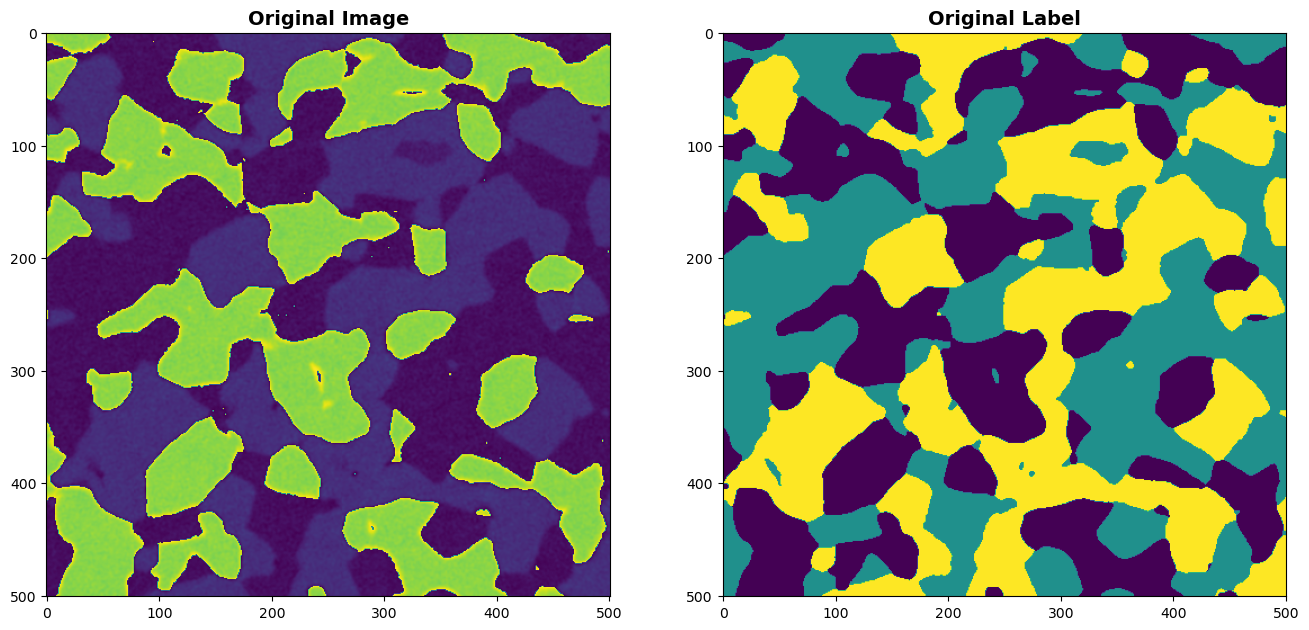

In [28]:
# plot the first image and its label
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(images_tensors[0].permute(1, 2, 0))
axs[0].set_title('Original Image', fontweight='bold', fontsize=14)
axs[1].imshow(labels_tensors[0].permute(1, 2, 0))
axs[1].set_title('Original Label', fontweight='bold', fontsize=14)